Last report date: 2021-04-06T00:00:00

Previous day doses administered: 76,199



Text(0, 0.5, 'Population in Millions')

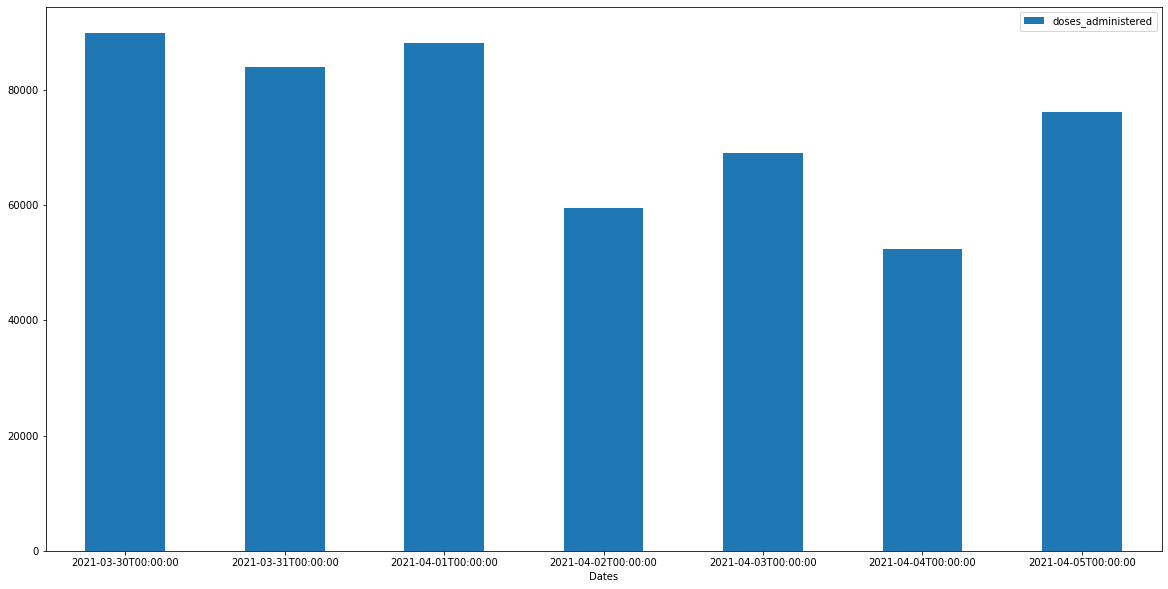

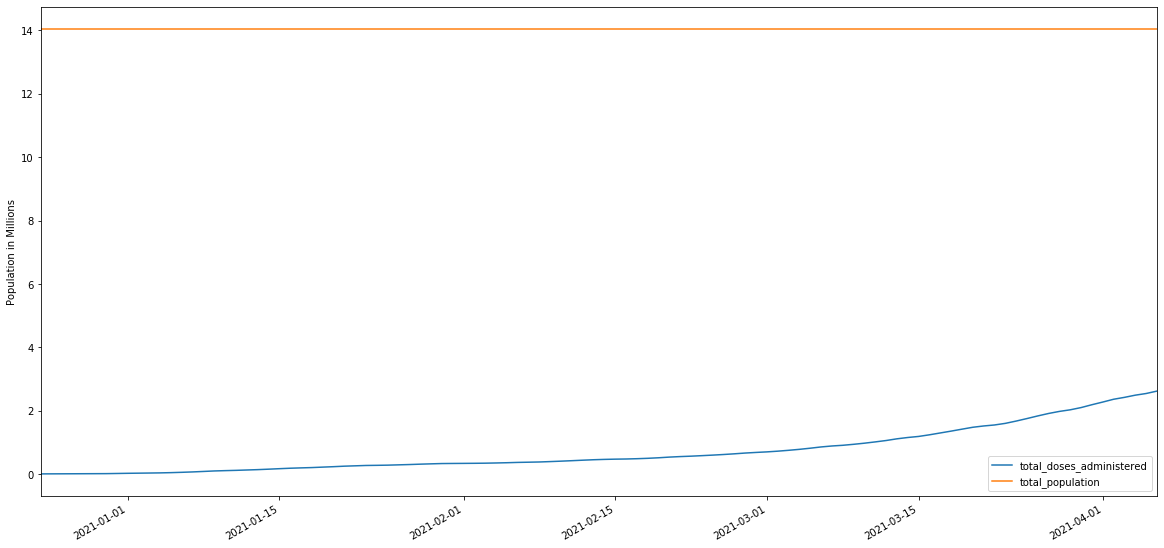

In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import urllib
import matplotlib.pyplot as plt
import json

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

url = 'https://data.ontario.ca/api/3/action/datastore_search?resource_id=8a89caa9-511c-4568-af89-7f2174b4378c'  
response = urllib.request.urlopen(url).read()

stats = json.loads(response.decode('utf-8'))

dates = []
total_doses_administered = []
total_population_array = []

total_population = '14,048,273'
million_divisor = 1000000

report_date = None
previous_day_doses_administered = None

for stat in stats['result']['records']:
    dates.append(stat['report_date'])
    total_doses_administered.append(stat['total_doses_administered'])
    total_population_array.append(total_population)
    report_date = stat['report_date']
    previous_day_doses_administered = stat['previous_day_doses_administered']
    
dates = pd.to_datetime(dates, errors='coerce', format='%Y-%m-%dT%H:%M:%S')
start_date = pd.to_datetime(dates[0], errors='coerce', format='%Y-%m-%dT%H:%M:%S')
end_date = pd.to_datetime(dates[-1], errors='coerce', format='%Y-%m-%dT%H:%M:%S')

last_seven_day_records = stats['result']['records'][-7:0]

print("Last report date: " + str(report_date))
print("")
print("Previous day doses administered: " + previous_day_doses_administered)
print("")

#print(dates)
#print(total_doses_administered)

df_total_doses_administered = pd.DataFrame({
   'total_doses_administered': total_doses_administered,
    'total_population': total_population_array
   }, index = dates)


last_seven_days_records = stats['result']['records'][-8:]

df_last_seven_days_records = pd.DataFrame({'Dates':[
    last_seven_days_records[0]['report_date'],
    last_seven_days_records[1]['report_date'],
    last_seven_days_records[2]['report_date'],
    last_seven_days_records[3]['report_date'],
    last_seven_days_records[4]['report_date'],
    last_seven_days_records[5]['report_date'],
    last_seven_days_records[6]['report_date'],
], 'doses_administered':[
    int(last_seven_days_records[1]['previous_day_doses_administered'].replace(',', '')),
    int(last_seven_days_records[2]['previous_day_doses_administered'].replace(',', '')),
    int(last_seven_days_records[3]['previous_day_doses_administered'].replace(',', '')),
    int(last_seven_days_records[4]['previous_day_doses_administered'].replace(',', '')),
    int(last_seven_days_records[5]['previous_day_doses_administered'].replace(',', '')),
    int(last_seven_days_records[6]['previous_day_doses_administered'].replace(',', '')),
    int(last_seven_days_records[7]['previous_day_doses_administered'].replace(',', '')),
]})

df_total_doses_administered = df_total_doses_administered.apply(lambda x: x.str.replace(',', ''))
df_total_doses_administered = df_total_doses_administered.astype(float)

df_total_doses_administered['total_doses_administered'] = df_total_doses_administered['total_doses_administered']/million_divisor
df_total_doses_administered['total_population'] = df_total_doses_administered['total_population']/million_divisor

df_last_seven_days_records.plot.bar(x='Dates', y='doses_administered', rot=0, figsize=(20,10))

lines = df_total_doses_administered.plot(figsize=(20,10))
lines.set_ylabel("Population in Millions")




